# Загрузка и предобработка данных

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ha_data.csv', sep = ';', on_bad_lines='skip')
df

<ipython-input-2-f56f6f57225d>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ha_data.csv', sep = ';', on_bad_lines='skip')


,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8225719,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8225720,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8225721,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8225722,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


Проверим сначала, что в первых двух столбцах численные значения и удалим стороки, где это не так

In [3]:
df['order_id'] = pd.to_numeric(df['order_id'], errors='coerce')
df['page_id'] = pd.to_numeric(df['page_id'], errors='coerce')

In [4]:
df[df['order_id'].isna() & df['page_id'].isna()].index

Index([116110], dtype='int64')

In [5]:
df[df['order_id'].isna() & df['page_id'].isna()]

,order_id,page_id,product,site_version,time,title,user
116110,NaN,NaN,user_21141,NaN,NaN,NaN,NaN


Это действительно очень странные строки, поэтому их надо удалить

In [6]:
df = df.drop([116110])

In [7]:
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8225719,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8225720,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8225721,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8225722,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [8]:
df.describe()

,order_id,page_id
count,241444.000000,7.984279e+06
mean,419204.419870,1.293161e+07
std,223968.418755,7.106982e+06
min,1.000000,3.000000e+00
25%,249648.750000,6.795186e+06
50%,411883.500000,1.308268e+07
75%,581190.500000,1.910872e+07
max,855750.000000,2.489722e+07


In [9]:
df.describe(include=['object'])

,product,site_version,time,title,user
count,8225723,8225723,8225723,8225722,8225719
unique,5,2,5672343,8,4157751
top,clothes,mobile,2017-05-17 09:39:20,banner_show,user_1934035
freq,1735946,5910504,9,7178942,23


Cделаем, чтобы product было 5 классов, site_version - 2, а title - 3

In [10]:
df['product'].unique()

array(['company', 'sneakers', 'sports_nutrition', 'accessories',
       'clothes'], dtype=object)

In [11]:
df[~df['product'].isin(['company', 'sneakers', 'sports_nutrition', 'accessories', 'clothes'])]

,order_id,page_id,product,site_version,time,title,user


In [12]:
df[~df['product'].isin(['company', 'sneakers', 'sports_nutrition', 'accessories', 'clothes'])].index

Index([], dtype='int64')

In [13]:
#df = df.drop([])

In [14]:
df['site_version'].unique()

array(['mobile', 'desktop'], dtype=object)

In [15]:
df[~df['site_version'].isin(['mobile', 'desktop'])]

,order_id,page_id,product,site_version,time,title,user


In [16]:
df[~df['site_version'].isin(['mobile', 'desktop'])].index

Index([], dtype='int64')

In [17]:
#df = df.drop([])

In [18]:
df['title'].unique()

array(['banner_show', 'banner_click', 'order', 'banner_how', nan,
       'bar_show', 'user_146190', 'bannuser_26772', 'user_157426'],
      dtype=object)

In [19]:
df[~df['title'].isin(['banner_show', 'banner_click', 'order'])]

,order_id,page_id,product,site_version,time,title,user
14916,NaN,21713.0,company,desktop,2017-01-30 06:09:55,banner_how,user_129069
44012,NaN,5186506.0,accessories,mobile,2017-02-17 10user_134845,NaN,NaN
87202,NaN,686792.0,accessories,desktop,2017-02-01 10:57:32,bar_show,user_15700
101814,NaN,91798.0,accessories,mobile,2017-02-2nner_show,user_146190,NaN
144948,NaN,14786381.0,sports_nutrition,mobile,2017-05-17 06:46:26,bannuser_26772,NaN
159457,NaN,141664.0,clothes,mobile,2017-02-11 18:04:er_show,user_157426,NaN


In [20]:
df[~df['title'].isin(['banner_show', 'banner_click', 'order'])].index

Index([14916, 44012, 87202, 101814, 144948, 159457], dtype='int64')

In [21]:
df = df.drop([14916, 44012, 87202, 101814, 144948, 159457])

In [22]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df[df['time'].isna()]

,order_id,page_id,product,site_version,time,title,user
58312,NaN,2762653.0,company,mobile,NaT,banner_show,user_10401


In [23]:
df[df['time'].isna()].index

Index([58312], dtype='int64')

In [24]:
df = df.drop([58312])
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8225719,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8225720,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8225721,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8225722,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [25]:
df.describe(include = ['object'])

,product,site_version,title,user
count,8225716,8225716,8225716,8225716
unique,5,2,3,4157751
top,clothes,mobile,banner_show,user_1934035
freq,1735945,5910499,7178941,23


In [26]:
df = df.drop_duplicates()

In [27]:
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8225719,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8225720,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8225721,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8225722,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


Новые данные уже в правильном формате и с ними можно работать

# Обработка данных

Будем считать только первые клики, а повторные не учитывать. То есть клик - ситуиция, когда для одного пользователя и товара минимальное время показа меньше максимального из времён кликов.

In [31]:
shows = df[df['title'] == 'banner_show'].groupby(['page_id', 'product', 'site_version', 'user'])['time'].min().reset_index()
clicks = df[df['title'] == 'banner_click'].groupby(['page_id', 'product', 'site_version', 'user'])['time'].min().reset_index()

merged = pd.merge(shows, clicks, on=['page_id', 'product', 'site_version', 'user'], suffixes=('_show', '_click'))

result = merged[merged['time_show']<merged['time_click']]
result

,page_id,product,site_version,user,time_show,time_click
0,14.0,sneakers,mobile,user_1,2017-01-29 13:02:23,2017-01-29 13:04:42
1,18.0,sneakers,desktop,user_2,2017-01-11 09:22:12,2017-01-11 09:24:43
2,47.0,sports_nutrition,mobile,user_9,2017-02-04 03:17:15,2017-02-04 03:18:45
3,61.0,sports_nutrition,mobile,user_12,2017-01-17 15:36:48,2017-01-17 15:37:41
4,104.0,accessories,mobile,user_24,2017-01-24 13:14:58,2017-01-24 13:17:54
...,...,...,...,...,...,...
805323,24897172.0,clothes,mobile,user_4254592,2017-05-25 19:24:31,2017-05-25 19:27:05
805324,24897174.0,accessories,desktop,user_4144027,2017-05-23 03:17:34,2017-05-23 03:18:02
805325,24897175.0,sports_nutrition,mobile,user_1574445,2017-05-24 11:11:02,2017-05-24 11:13:35
805326,24897185.0,accessories,mobile,user_4254615,2017-05-26 13:17:44,2017-05-26 13:21:04


Сделаем таблицу с кликами, показами и заказами для каждой категории

In [62]:
banner_shows = shows.groupby(['product', 'site_version']).size().reset_index(name='shows')

banner_clicks = result.groupby(['product', 'site_version']).size().reset_index(name='clicks')

orders = df[df['title']=='order'].groupby(['product', 'site_version']).size().reset_index(name='orders')

banner_stats1 = pd.merge(banner_shows, banner_clicks, on=['product', 'site_version'], how='outer').fillna(0)
banner_stats2 = pd.merge(banner_stats1, orders, on=['product', 'site_version'], how='outer').fillna(0)
banner_stats2

,product,site_version,shows,clicks,orders
0,accessories,desktop,398873,17963,21479.0
1,accessories,mobile,1001360,113914,21786.0
2,clothes,desktop,406675,31736,64897.0
3,clothes,mobile,1005452,181981,44411.0
4,company,desktop,461883,27434,0.0
5,company,mobile,1067654,112250,0.0
6,sneakers,desktop,400427,20769,31635.0
7,sneakers,mobile,1011735,156078,34170.0
8,sports_nutrition,desktop,406421,13458,11167.0
9,sports_nutrition,mobile,1018461,126822,11899.0


Также можно косвенно вычислить заказы после показа объявления или после клика, если в течение некоторого времени(предположим, что недели) до было показано или кликнуто объявление из той же категории

In [63]:
show = df[df['title'] == 'banner_show']
click = df[df['title'] == 'banner_click']

order = df[df['title']=='order']

sh_order = pd.merge(show, order, on=['product', 'site_version', 'user'], suffixes=('_show', '_order'))
sh_order = sh_order[sh_order['time_show']<sh_order['time_order']]
sh_order = sh_order[(sh_order['time_order'] - sh_order['time_show']) < pd.Timedelta(days = 7)]
result_sh_order1 = sh_order.groupby(['product', 'site_version', 'user', 'page_id_show'])['time_order'].min().reset_index()
result_sh_order = result_sh_order1.groupby(['product', 'site_version']).size().reset_index(name='orders_after_show')

cl_order = pd.merge(click, order, on=['product', 'site_version', 'user'], suffixes=('_click', '_order'))
cl_order = cl_order[cl_order['time_click']<cl_order['time_order']]
cl_order = cl_order[(cl_order['time_order'] - cl_order['time_click']) < pd.Timedelta(days = 7)]
result_cl_order1 = cl_order.groupby(['product', 'site_version', 'user', 'page_id_click'])['time_order'].min().reset_index()
result_cl_order = result_cl_order1.groupby(['product', 'site_version']).size().reset_index(name='orders_after_click')

In [70]:
banner_stats = pd.merge(banner_stats2, result_sh_order, on=['product', 'site_version'], how='outer').fillna(0)
banner_stats = pd.merge(banner_stats, result_cl_order, on=['product', 'site_version'], how='outer').fillna(0)
banner_stats['orders'] = banner_stats['orders'].astype('int')
banner_stats['orders_after_show'] = banner_stats['orders_after_show'].astype('int')
banner_stats['orders_after_click'] = banner_stats['orders_after_click'].astype('int')
banner_stats

,product,site_version,shows,clicks,orders,orders_after_show,orders_after_click
0,accessories,desktop,398873,17963,21479,1253,156
1,accessories,mobile,1001360,113914,21786,1255,386
2,clothes,desktop,406675,31736,64897,3341,672
3,clothes,mobile,1005452,181981,44411,2643,1073
4,company,desktop,461883,27434,0,0,0
5,company,mobile,1067654,112250,0,0,0
6,sneakers,desktop,400427,20769,31635,1744,252
7,sneakers,mobile,1011735,156078,34170,1949,716
8,sports_nutrition,desktop,406421,13458,11167,701,77
9,sports_nutrition,mobile,1018461,126822,11899,701,210


Получили таблицу показов, кликов и различных типов покупок в разрезе продукта и типа устройства

# Визуализация данных

Визуализируем вероятности откликов и соотношения покупок после откликов, откликов и покупок

In [77]:
click_stats = banner_stats[['product', 'site_version', 'shows', 'clicks']]
click_stats['shows'] = click_stats['shows'] - click_stats['clicks']
click_stats = click_stats.rename(columns={'shows': 'shows_without_clicks'})
click_stats

<ipython-input-77-91490fc9f7ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_stats['shows'] = click_stats['shows'] - click_stats['clicks']


,product,site_version,shows_without_clicks,clicks
0,accessories,desktop,380910,17963
1,accessories,mobile,887446,113914
2,clothes,desktop,374939,31736
3,clothes,mobile,823471,181981
4,company,desktop,434449,27434
5,company,mobile,955404,112250
6,sneakers,desktop,379658,20769
7,sneakers,mobile,855657,156078
8,sports_nutrition,desktop,392963,13458
9,sports_nutrition,mobile,891639,126822


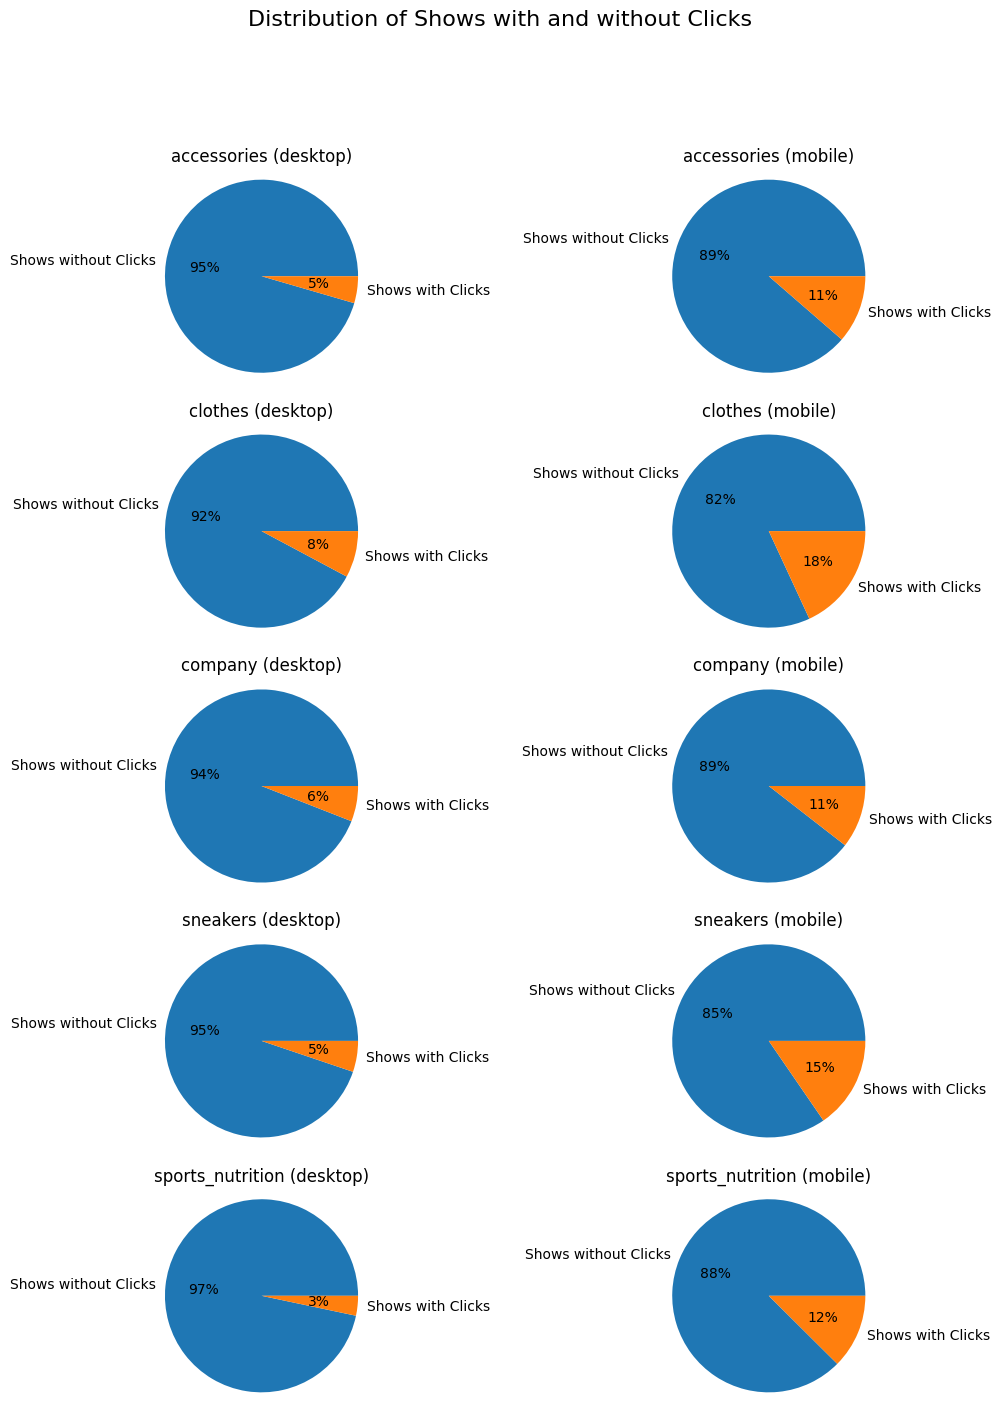

In [89]:
fig, axes = plt.subplots(5, 2, figsize=(12, 16))

axes = axes.ravel()

for i, row in click_stats.iterrows():
    labels = ['Shows without Clicks', 'Shows with Clicks']
    sizes = [row['shows_without_clicks'], row['clicks']]
    axes[i].pie(sizes, labels=labels, autopct='%1.0f%%')
    axes[i].axis('equal')
    axes[i].set_title(f"{row['product']} ({row['site_version']})")

plt.suptitle('Distribution of Shows with and without Clicks', fontsize=16)
plt.show()

**Минивывод:** Количество кликов относительно откликов общего количества показов значительное, при этом на мобильных устройствах отклики случаются чаще. Стоит также заметить, что клики на баннеры с самим сайтом не сильно отличаются от кликов на продукты

In [92]:
order_stats = banner_stats[['product', 'site_version', 'orders', 'orders_after_click']]
order_stats['orders'] = order_stats['orders'] - order_stats['orders_after_click']
order_stats = order_stats.rename(columns={'orders': 'orders_without_clicks'})
order_stats = order_stats.drop([4,5]).reset_index()
order_stats

<ipython-input-92-47e746a4f3b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_stats['orders'] = order_stats['orders'] - order_stats['orders_after_click']


,index,product,site_version,orders_without_clicks,orders_after_click
0,0,accessories,desktop,21323,156
1,1,accessories,mobile,21400,386
2,2,clothes,desktop,64225,672
3,3,clothes,mobile,43338,1073
4,6,sneakers,desktop,31383,252
5,7,sneakers,mobile,33454,716
6,8,sports_nutrition,desktop,11090,77
7,9,sports_nutrition,mobile,11689,210


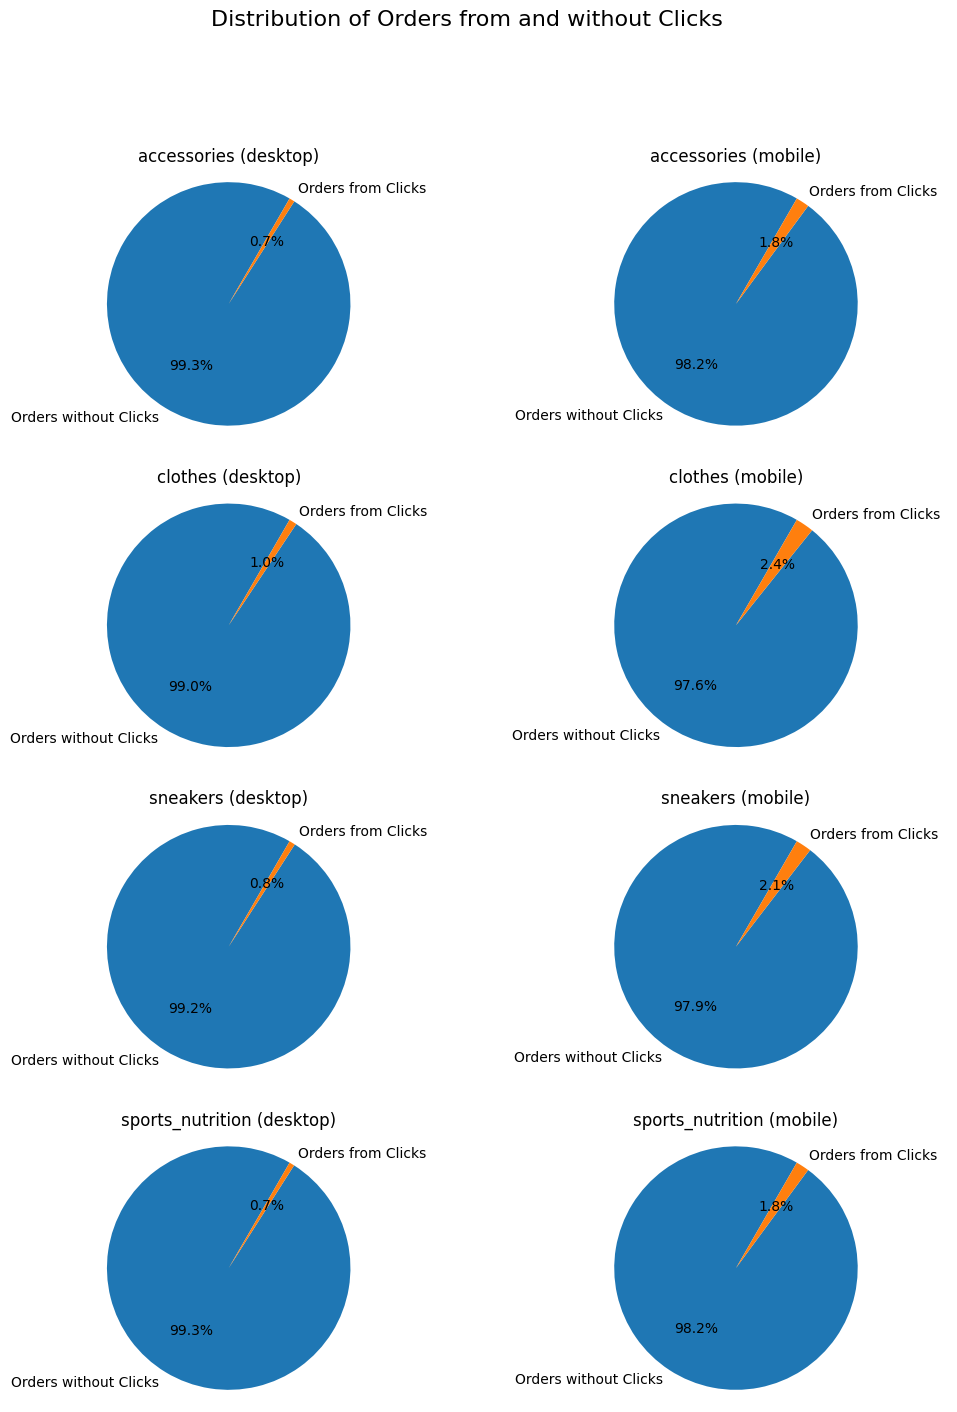

In [106]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

axes = axes.ravel()

for i, row in order_stats.iterrows():
    labels = ['Orders without Clicks', 'Orders from Clicks']
    sizes = [row['orders_without_clicks'], row['orders_after_click']]
    axes[i].pie(sizes, labels=labels, startangle=60, autopct='%1.1f%%')
    axes[i].axis('equal')
    axes[i].set_title(f"{row['product']} ({row['site_version']})")

axes = axes.T
plt.suptitle('Distribution of Orders from and without Clicks', fontsize=16)
plt.show()

**Минивывод:** Зачетим, что покупки после кликов не больше трёх процентов от общего числа покупок

In [95]:
order_click_stats = banner_stats[['product', 'site_version', 'clicks', 'orders_after_click']]
order_click_stats['clicks'] = order_click_stats['clicks'] - order_click_stats['orders_after_click']
order_click_stats = order_click_stats.rename(columns={'clicks': 'clicks_without_orders'})
order_click_stats = order_click_stats.drop([4,5]).reset_index()
order_click_stats

<ipython-input-95-aa56cf0a0064>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_click_stats['clicks'] = order_click_stats['clicks'] - order_click_stats['orders_after_click']


,index,product,site_version,clicks_without_orders,orders_after_click
0,0,accessories,desktop,17807,156
1,1,accessories,mobile,113528,386
2,2,clothes,desktop,31064,672
3,3,clothes,mobile,180908,1073
4,6,sneakers,desktop,20517,252
5,7,sneakers,mobile,155362,716
6,8,sports_nutrition,desktop,13381,77
7,9,sports_nutrition,mobile,126612,210


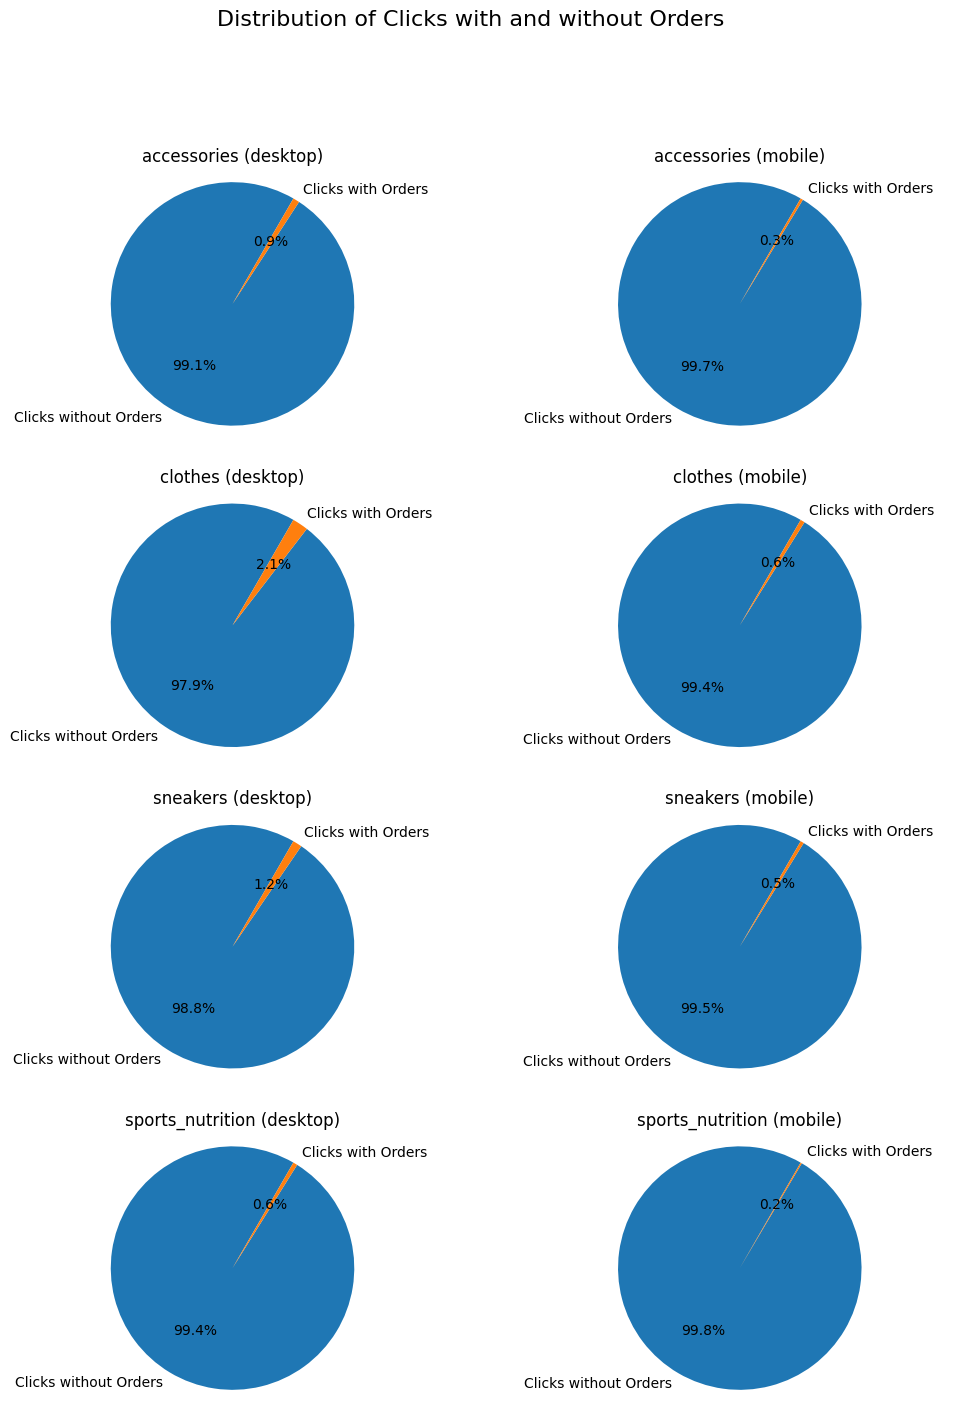

In [100]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

axes = axes.ravel()

for i, row in order_click_stats.iterrows():
    labels = ['Clicks without Orders', 'Clicks with Orders']
    sizes = [row['clicks_without_orders'], row['orders_after_click']]
    axes[i].pie(sizes, labels=labels, startangle=60, autopct='%1.1f%%')
    axes[i].axis('equal')
    axes[i].set_title(f"{row['product']} ({row['site_version']})")

plt.suptitle('Distribution of Clicks with and without Orders', fontsize=16)
plt.show()

**Минивывод:** Аналогичным образом замечаем, что клики с дальнейшей покупкой занимают не больше трёх процентов от общего числа кликов


# Вывод


Таким образом получаем, что выгоднее продать баннерное место под рекламу другого сайта, ибо покупки после откликов занимают лишь малую часть от количества покупок и количества откликов для всех категорий, в то время как вероятность отклика на баннер довольно высока. При этом таковая вероятность выше с мобильного устройства.